In [1]:
import dlib
import cv2
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,10)
%matplotlib inline

def showImages(imgs):
    for x in imgs:
        plt.figure()
        ax=plt.subplot(111)
        ax.set_aspect('equal')
        plt.imshow(x)

In [2]:
img=cv2.imread('data/face1.jpeg')
H,W,_=img.shape
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# img=cv2.resize(img,(1024,768))

In [2]:
def gauss_pyramid(I):
    ret=[I]
    
    n=int(np.log2(min(img.shape[:2])//32))+1
    
    for i in range(1,n):
        ret.append(cv2.pyrDown(ret[i-1]))
    return ret
def laplacian_pyramid(gs):
    L=gs[-1]
    ret=[L]
    n=len(gs)
    for i in range(n-2,-1,-1):
        g=gs[i]
        H,W=g.shape[:2]
        L=cv2.subtract(g,cv2.pyrUp(gs[i+1],dstsize=(W,H)))
        ret.append(L)
    ret.reverse()
    return ret
def sum_laplacian_pyramid(ls):
    ret=ls[-1]
    n=len(ls)
    for i in range(n-2,-1,-1):
        L=ls[i]
        H,W=L.shape[:2]
        ret=cv2.add(L,cv2.pyrUp(ret,dstsize=(W,H)))
    return ret

In [3]:
gs=gauss_pyramid(img)
ls=laplacian_pyramid(gs)
I=sum_laplacian_pyramid(ls)
plt.imshow(I)

NameError: name 'img' is not defined

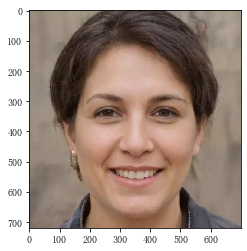

In [69]:
plt.imshow(img)